<img src='../../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 2 חלק 2: ניקיון, הכנה וחקירת ניתונים</h1>
    <h1 style="text-align: center;"> Ex 2 part 2: Data preperation and exploration</h1>
</div>

# Exercise outline
1. Data Science Process
2. Data Preparation and Cleaning
3. Data Exploration Analysis (EDA)


# 1.The Data Science Process

<p>Diagram based on <a herf="https://www.youtube.com/watch?app=desktop&v=3vNvwIxTHIM">https://www.youtube.com/watch?app=desktop&v=3vNvwIxTHIM</a></p>
<div align='center'><img width =800 src='../../images/data_science_process.jpg'/></div>

# 2. Data Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels
import plotly.io as pio
pio.renderers.default = 'iframe'


### Exploring the data for the first time

In [2]:
df = pd.read_csv('real_estate_tlv.csv')

In [3]:
# see the first five rows
df.head()

,תאריך,גוש חלקה תת חלקה,תיאור,חדרים,קומה,שטח,מחיר
0,30.11.2023,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00"
1,23.11.2023,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00"
2,05.11.2023,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00"
3,03.11.2023,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00"
4,02.11.2023,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00"


In [4]:
# see the last ten rows
df.tail(10)

,תאריך,גוש חלקה תת חלקה,תיאור,חדרים,קומה,שטח,מחיר
238,29.11.2022,6941-77-10,דירה בבית קומות,4.0,שלישית,64.00,"₪4,600,000.00"
239,27.11.2022,6941-131-7,דירה בבית קומות,2.0,שניה,70.00,"₪3,300,000.00"
240,27.11.2022,6936-63-1,דירה בבית קומות,4.0,ראשונה,91.00,"₪6,900,000.00"
241,24.11.2022,6911-71-7,דירה בבית קומות,2.0,ראשונה,41.64,"₪2,870,000.00"
242,24.11.2022,6941-95-16,משרד,0.0,ראשונה,NaN,"₪95,000,000.00"
243,21.11.2022,09/01/7438,דירה בבית קומות,4.0,שלישית,119.00,"₪10,250,000.00"
244,20.11.2022,10/09/7462,דירה בבית קומות,3.0,ראשונה,64.00,"₪4,388,000.00"
245,17.11.2022,6910-29-8,דירה בבית קומות,3.0,ראשונה,63.00,"₪3,610,000.00"
246,17.11.2022,6933-21-22,דירה בבית קומות,3.0,קומה 4,56.90,"₪2,600,000.00"
247,17.11.2022,6911-154-5,דירה בבית קומות,3.5,שניה,71.00,"₪5,350,000.00"


In [5]:
# Info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   תאריך             248 non-null    object 
 1   גוש חלקה תת חלקה  248 non-null    object 
 2   תיאור             237 non-null    object 
 3   חדרים             248 non-null    float64
 4   קומה              234 non-null    object 
 5   שטח               224 non-null    float64
 6   מחיר              248 non-null    object 
dtypes: float64(2), object(5)
memory usage: 13.7+ KB


In [6]:
# Translating columns to english

In [7]:
df.columns

Index(['תאריך', 'גוש חלקה תת חלקה', 'תיאור', 'חדרים', 'קומה', 'שטח', 'מחיר'], dtype='object')

In [8]:
col_translate_eng = dict(zip(df.columns, ['date', 'block_parcel', 'description', 'rooms' ,'floor', 'area_sqm', 'price']))

In [9]:
# overwrite the columns translate to english
df.rename(columns=col_translate_eng, inplace=True)

In [10]:
df.head()

,date,block_parcel,description,rooms,floor,area_sqm,price
0,30.11.2023,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00"
1,23.11.2023,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00"
2,05.11.2023,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00"
3,03.11.2023,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00"
4,02.11.2023,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00"


## Dealing with dates

In [11]:
df['date'].head()

0    30.11.2023
1    23.11.2023
2    05.11.2023
3    03.11.2023
4    02.11.2023
Name: date, dtype: object

In [12]:
pd.to_datetime(df['date'], format="%d.%m.%Y").head()

0   2023-11-30
1   2023-11-23
2   2023-11-05
3   2023-11-03
4   2023-11-02
Name: date, dtype: datetime64[ns]

In [13]:
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")

### Dealing with dates¶

In [14]:
df['block_parcel'].head(25)

0      04/10/7437
1       7226-45-6
2      6918-53-38
3       7441-16-3
4       7438-13-2
5       7451-22-6
6      6907-32-23
7       6907-82-5
8      6941-123-6
9       6919-58-8
10      7429-51-7
11      6937-29-6
12     6918-61-24
13      7429-53-5
14     10/13/6912
15      6936-65-3
16     6933-91-10
17     09/09/7228
18      7462-24-5
19    6933-136-77
20      7226-23-3
21      6918-82-4
22      6911-53-3
23     03/06/7446
24      6936-50-4
Name: block_parcel, dtype: object

In [15]:
# we can deal with '-' and '/' separately
df['block_parcel'].apply(lambda p: '-' in p)

0      False
1       True
2       True
3       True
4       True
       ...  
243    False
244    False
245     True
246     True
247     True
Name: block_parcel, Length: 248, dtype: bool

In [16]:
q1 = df['block_parcel'].apply(lambda p: '-' in p)
q2 = df['block_parcel'].apply(lambda p: '/' in p)

In [17]:
q1.sum()

215

In [18]:
q2.sum()

33

In [19]:
df.loc[q1, 'block_parcel'].head()

1     7226-45-6
2    6918-53-38
3     7441-16-3
4     7438-13-2
5     7451-22-6
Name: block_parcel, dtype: object

In [20]:
df.loc[q2, 'block_parcel'].head()

0     04/10/7437
14    10/13/6912
17    09/09/7228
23    03/06/7446
40    10/05/6936
Name: block_parcel, dtype: object

In [21]:
df.loc[q1, 'block_parcel'].apply(lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], data = p.split('-')))

,block,parcel,sub_parcel
1,7226,45,6
2,6918,53,38
3,7441,16,3
4,7438,13,2
5,7451,22,6
...,...,...,...
241,6911,71,7
242,6941,95,16
245,6910,29,8
246,6933,21,22


In [22]:
df.loc[q1, ['block', 'parcel', 'sub_parcel']] = df.loc[q1, 'block_parcel'].apply(\
        lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], \
                    data = [int(item) for item in p.split('-')]))

In [23]:
df.head()

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00",NaN,NaN,NaN
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00",7226.0,45.0,6.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00",6918.0,53.0,38.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00",7441.0,16.0,3.0
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00",7438.0,13.0,2.0


In [24]:
df.loc[q2, ['block', 'parcel', 'sub_parcel']] = df.loc[q2, 'block_parcel'].apply(\
            lambda p: pd.Series(index=['block', 'parcel', 'sub_parcel'], \
                        data = [int(item) for item in p.split('/')][::-1]))

In [25]:
df.head()

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00",7437.0,10.0,4.0
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00",7226.0,45.0,6.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00",6918.0,53.0,38.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00",7441.0,16.0,3.0
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00",7438.0,13.0,2.0


### Description

In [26]:
df['description'].value_counts()

description
דירה בבית קומות     139
דירה בבית קומות      48
משרד                 17
חנות                  7
חנות                  5
חניה                  4
קרקע למגורים          4
מחסנים                2
מחסנים                2
דירת גג               2
קומבינציה             2
מגורים                1
משרד                  1
בית בודד              1
דירת גן               1
ללא תיכנון            1
Name: count, dtype: int64

In [27]:
df['description'].apply(lambda p: str(p).strip()).value_counts()

description
דירה בבית קומות    187
משרד                18
חנות                12
nan                 11
מחסנים               4
חניה                 4
קרקע למגורים         4
דירת גג              2
קומבינציה            2
מגורים               1
בית בודד             1
דירת גן              1
ללא תיכנון           1
Name: count, dtype: int64

In [28]:
df['description_'] = df['description'].apply(lambda p: str(p).strip())

In [29]:
df['description_'].unique()

array(['דירה בבית קומות', 'מגורים', 'חנות', 'משרד', 'מחסנים', 'nan',
       'בית בודד', 'חניה', 'קרקע למגורים', 'דירת גן', 'דירת גג',
       'קומבינציה', 'ללא תיכנון'], dtype=object)

In [30]:
# replace nan with Unkown

In [31]:
df[df['description_'] == 'nan']

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_
68,2023-06-12,6920-38-67,NaN,5.0,שלישית,104.0,"₪9,000,000.00",6920.0,38.0,67.0,nan
87,2023-05-14,6911-127-2,NaN,3.0,ראשונה,62.0,"₪2,296,962.00",6911.0,127.0,2.0,nan
149,2023-02-22,6904-125-3,NaN,6.0,שניה,193.0,"₪26,000,000.00",6904.0,125.0,3.0,nan
156,2023-02-15,07/02/7450,NaN,3.0,NaN,69.0,"₪4,670,000.00",7450.0,2.0,7.0,nan
191,2023-01-15,7430-37-5,NaN,4.0,שניה,NaN,"₪50,000.00",7430.0,37.0,5.0,nan
204,2023-01-02,7226-93-11,NaN,2.0,שניה,46.0,"₪3,344,335.00",7226.0,93.0,11.0,nan
205,2023-01-02,7226-93-12,NaN,2.0,שניה,48.0,"₪3,348,116.00",7226.0,93.0,12.0,nan
206,2023-01-02,7226-93-14,NaN,2.0,רביעית,48.0,"₪3,486,967.00",7226.0,93.0,14.0,nan
207,2023-01-02,7226-93-15,NaN,2.0,רביעית,49.0,"₪3,545,316.00",7226.0,93.0,15.0,nan
208,2023-01-02,7226-93-16,NaN,3.0,שניה,61.0,"₪4,216,885.00",7226.0,93.0,16.0,nan


In [32]:
df.loc[df['description_'] == 'nan', 'description_'] = 'Unknown'

In [33]:
df[df['description_'] == 'Unknown']

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_
68,2023-06-12,6920-38-67,NaN,5.0,שלישית,104.0,"₪9,000,000.00",6920.0,38.0,67.0,Unknown
87,2023-05-14,6911-127-2,NaN,3.0,ראשונה,62.0,"₪2,296,962.00",6911.0,127.0,2.0,Unknown
149,2023-02-22,6904-125-3,NaN,6.0,שניה,193.0,"₪26,000,000.00",6904.0,125.0,3.0,Unknown
156,2023-02-15,07/02/7450,NaN,3.0,NaN,69.0,"₪4,670,000.00",7450.0,2.0,7.0,Unknown
191,2023-01-15,7430-37-5,NaN,4.0,שניה,NaN,"₪50,000.00",7430.0,37.0,5.0,Unknown
204,2023-01-02,7226-93-11,NaN,2.0,שניה,46.0,"₪3,344,335.00",7226.0,93.0,11.0,Unknown
205,2023-01-02,7226-93-12,NaN,2.0,שניה,48.0,"₪3,348,116.00",7226.0,93.0,12.0,Unknown
206,2023-01-02,7226-93-14,NaN,2.0,רביעית,48.0,"₪3,486,967.00",7226.0,93.0,14.0,Unknown
207,2023-01-02,7226-93-15,NaN,2.0,רביעית,49.0,"₪3,545,316.00",7226.0,93.0,15.0,Unknown
208,2023-01-02,7226-93-16,NaN,3.0,שניה,61.0,"₪4,216,885.00",7226.0,93.0,16.0,Unknown


In [34]:
df['floor'].value_counts()

floor
ראשונה                64
שלישית                42
שניה                  37
רביעית                22
קרקע                  17
חמישית                11
קומה 1                 4
קומה 4                 3
קומה 3                 3
מרתף                   3
קומה 5                 2
קרקע ובניים            1
קומה 0                 1
רביעית וגג             1
עשרים ושמונה           1
מרתף,קרקע              1
----                   1
-                      1
שמינית                 1
עשרים ושלוש            1
אחת עשרה               1
שישית                  1
קומה 6                 1
חמש עשרה               1
עשרים                  1
אח עשרה                1
ארבעים                 1
שלישית, רביעית         1
עמודים                 1
ביניים                 1
שלישית+רביעית          1
שתים עשרה,שלש עשרה     1
חמישית, שישית          1
שמונה עשרה             1
מרתף חמישי, קרקע       1
-------------          1
רביעית וחמישית         1
Name: count, dtype: int64

In [35]:
# view as dataframe is easier

In [36]:
df['floor'].value_counts().to_frame().reset_index()

,floor,count
0,ראשונה,64
1,שלישית,42
2,שניה,37
3,רביעית,22
4,קרקע,17
5,חמישית,11
6,קומה 1,4
7,קומה 4,3
8,קומה 3,3
9,מרתף,3


In [37]:
translate_floor = df['floor'].value_counts().to_frame().reset_index()

In [38]:
translate_floor['floor_cat'] = translate_floor['floor'].apply(lambda p: 'Unknown' if '-' in p else np.nan)

In [39]:
translate_floor

,floor,count,floor_cat
0,ראשונה,64,NaN
1,שלישית,42,NaN
2,שניה,37,NaN
3,רביעית,22,NaN
4,קרקע,17,NaN
5,חמישית,11,NaN
6,קומה 1,4,NaN
7,קומה 4,3,NaN
8,קומה 3,3,NaN
9,מרתף,3,NaN


In [40]:
translate_floor.loc[translate_floor['floor_cat'].isna(),'floor']

0                 ראשונה
1                 שלישית
2                   שניה
3                 רביעית
4                   קרקע
5                 חמישית
6                 קומה 1
7                 קומה 4
8                 קומה 3
9                   מרתף
10                קומה 5
11           קרקע ובניים
12                קומה 0
13            רביעית וגג
14          עשרים ושמונה
15             מרתף,קרקע
18                שמינית
19           עשרים ושלוש
20              אחת עשרה
21                 שישית
22                קומה 6
23              חמש עשרה
24                 עשרים
25               אח עשרה
26                ארבעים
27        שלישית, רביעית
28                עמודים
29                ביניים
30         שלישית+רביעית
31    שתים עשרה,שלש עשרה
32         חמישית, שישית
33            שמונה עשרה
34      מרתף חמישי, קרקע
36        רביעית וחמישית
Name: floor, dtype: object

In [41]:
floors_egn = ['floor_1',
 'floor_3',
 'floor_2',
 'floor_4',
 'ground',
 'floor_5',
 'floor_5',
 'floor_1',
 'floor_4',
 'floor_3',
 'basement',
 'ground',
 'ground_floor_1',
 'floor_4_roof',
 'floor_28',
 'ground_basement',
 'floor_8',
 'floor_6',
 'floor_6',
 'floor_15',
 'floor_23',
 'floor_20',
 'floor_11',
 'floor_11',
 'floor_40',
 'floor_3_floor_4',
 'floor_1',
 'floor_1',
 'floor_3_floor_4',
 'floor_12_floor_13',
 'floor_5_floor_6',
 'floor_18',
 'basement_floor_5_ground',
 'floor_4_floor_5']
translate_floor_dict = dict(zip(translate_floor.loc[translate_floor['floor_cat'].isna(),'floor'], floors_egn))

In [42]:
translate_floor_dict

{'ראשונה': 'floor_1',
 'שלישית': 'floor_3',
 'שניה': 'floor_2',
 'רביעית': 'floor_4',
 'קרקע': 'ground',
 'חמישית': 'floor_5',
 'קומה 1': 'floor_5',
 'קומה 4': 'floor_1',
 'קומה 3': 'floor_4',
 'מרתף': 'floor_3',
 'קומה 5': 'basement',
 'קרקע ובניים': 'ground',
 'קומה 0': 'ground_floor_1',
 'רביעית וגג': 'floor_4_roof',
 'עשרים ושמונה': 'floor_28',
 'מרתף,קרקע': 'ground_basement',
 'שמינית': 'floor_8',
 'עשרים ושלוש': 'floor_6',
 'אחת עשרה': 'floor_6',
 'שישית': 'floor_15',
 'קומה 6': 'floor_23',
 'חמש עשרה': 'floor_20',
 'עשרים': 'floor_11',
 'אח עשרה': 'floor_11',
 'ארבעים': 'floor_40',
 'שלישית, רביעית': 'floor_3_floor_4',
 'עמודים': 'floor_1',
 'ביניים': 'floor_1',
 'שלישית+רביעית': 'floor_3_floor_4',
 'שתים עשרה,שלש עשרה': 'floor_12_floor_13',
 'חמישית, שישית': 'floor_5_floor_6',
 'שמונה עשרה': 'floor_18',
 'מרתף חמישי, קרקע': 'basement_floor_5_ground',
 'רביעית וחמישית': 'floor_4_floor_5'}

In [43]:
translate_floor.loc[translate_floor['floor_cat'].isna(),'floor_eng'] = translate_floor.loc[translate_floor['floor_cat'].isna(),'floor'].apply(lambda p: translate_floor_dict.get(p))

In [44]:
translate_floor.head()

,floor,count,floor_cat,floor_eng
0,ראשונה,64,NaN,floor_1
1,שלישית,42,NaN,floor_3
2,שניה,37,NaN,floor_2
3,רביעית,22,NaN,floor_4
4,קרקע,17,NaN,ground


In [45]:
{f'floor_{i}': i for i in range(0, 41)}

{'floor_0': 0,
 'floor_1': 1,
 'floor_2': 2,
 'floor_3': 3,
 'floor_4': 4,
 'floor_5': 5,
 'floor_6': 6,
 'floor_7': 7,
 'floor_8': 8,
 'floor_9': 9,
 'floor_10': 10,
 'floor_11': 11,
 'floor_12': 12,
 'floor_13': 13,
 'floor_14': 14,
 'floor_15': 15,
 'floor_16': 16,
 'floor_17': 17,
 'floor_18': 18,
 'floor_19': 19,
 'floor_20': 20,
 'floor_21': 21,
 'floor_22': 22,
 'floor_23': 23,
 'floor_24': 24,
 'floor_25': 25,
 'floor_26': 26,
 'floor_27': 27,
 'floor_28': 28,
 'floor_29': 29,
 'floor_30': 30,
 'floor_31': 31,
 'floor_32': 32,
 'floor_33': 33,
 'floor_34': 34,
 'floor_35': 35,
 'floor_36': 36,
 'floor_37': 37,
 'floor_38': 38,
 'floor_39': 39,
 'floor_40': 40}

In [46]:
floor_to_number_dict = {f'floor_{i}': i for i in range(0, 41)}
floor_to_number_dict.update({'ground': 0, 'basement': -1, })

In [47]:
floor_to_number_dict

{'floor_0': 0,
 'floor_1': 1,
 'floor_2': 2,
 'floor_3': 3,
 'floor_4': 4,
 'floor_5': 5,
 'floor_6': 6,
 'floor_7': 7,
 'floor_8': 8,
 'floor_9': 9,
 'floor_10': 10,
 'floor_11': 11,
 'floor_12': 12,
 'floor_13': 13,
 'floor_14': 14,
 'floor_15': 15,
 'floor_16': 16,
 'floor_17': 17,
 'floor_18': 18,
 'floor_19': 19,
 'floor_20': 20,
 'floor_21': 21,
 'floor_22': 22,
 'floor_23': 23,
 'floor_24': 24,
 'floor_25': 25,
 'floor_26': 26,
 'floor_27': 27,
 'floor_28': 28,
 'floor_29': 29,
 'floor_30': 30,
 'floor_31': 31,
 'floor_32': 32,
 'floor_33': 33,
 'floor_34': 34,
 'floor_35': 35,
 'floor_36': 36,
 'floor_37': 37,
 'floor_38': 38,
 'floor_39': 39,
 'floor_40': 40,
 'ground': 0,
 'basement': -1}

In [48]:
translate_floor['floor_number'] = translate_floor['floor_eng'].apply(lambda p: floor_to_number_dict.get(p, np.nan))

In [49]:
translate_floor.head()

,floor,count,floor_cat,floor_eng,floor_number
0,ראשונה,64,NaN,floor_1,1.0
1,שלישית,42,NaN,floor_3,3.0
2,שניה,37,NaN,floor_2,2.0
3,רביעית,22,NaN,floor_4,4.0
4,קרקע,17,NaN,ground,0.0


In [50]:
translate_floor

,floor,count,floor_cat,floor_eng,floor_number
0,ראשונה,64,NaN,floor_1,1.0
1,שלישית,42,NaN,floor_3,3.0
2,שניה,37,NaN,floor_2,2.0
3,רביעית,22,NaN,floor_4,4.0
4,קרקע,17,NaN,ground,0.0
5,חמישית,11,NaN,floor_5,5.0
6,קומה 1,4,NaN,floor_5,5.0
7,קומה 4,3,NaN,floor_1,1.0
8,קומה 3,3,NaN,floor_4,4.0
9,מרתף,3,NaN,floor_3,3.0


In [51]:
translate_floor[translate_floor['floor_number'].notna()][['floor','floor_number']].set_index('floor').to_dict()['floor_number']

{'ראשונה': 1.0,
 'שלישית': 3.0,
 'שניה': 2.0,
 'רביעית': 4.0,
 'קרקע': 0.0,
 'חמישית': 5.0,
 'קומה 1': 5.0,
 'קומה 4': 1.0,
 'קומה 3': 4.0,
 'מרתף': 3.0,
 'קומה 5': -1.0,
 'קרקע ובניים': 0.0,
 'עשרים ושמונה': 28.0,
 'שמינית': 8.0,
 'עשרים ושלוש': 6.0,
 'אחת עשרה': 6.0,
 'שישית': 15.0,
 'קומה 6': 23.0,
 'חמש עשרה': 20.0,
 'עשרים': 11.0,
 'אח עשרה': 11.0,
 'ארבעים': 40.0,
 'עמודים': 1.0,
 'ביניים': 1.0,
 'שמונה עשרה': 18.0}

In [52]:
floor_heb_to_number_dict = translate_floor[translate_floor['floor_number'].notna()][['floor','floor_number']].set_index('floor').to_dict()['floor_number']

In [53]:
floor_heb_to_number_dict['שמונה עשרה']

18.0

In [54]:
df.loc[df['floor'].notna(), 'floor_number'] = df.loc[df['floor'].notna(), 'floor'].apply(lambda p: floor_heb_to_number_dict.get(p.strip()))

In [55]:
df.head()

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,"₪4,270,000.00",7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,"₪4,600,000.00",7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,"₪3,650,000.00",6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,"₪700,000.00",7441.0,16.0,3.0,מגורים,NaN
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,"₪2,050,000.00",7438.0,13.0,2.0,דירה בבית קומות,0.0


### Price

In [56]:
df['price'].head()

0    ₪4,270,000.00 
1    ₪4,600,000.00 
2    ₪3,650,000.00 
3      ₪700,000.00 
4    ₪2,050,000.00 
Name: price, dtype: object

In [57]:
df['price'] = df['price'].apply(lambda p: p.replace('₪','').replace(',','')).astype(float)

In [58]:
df.head()

,date,block_parcel,description,rooms,floor,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,04/10/7437,דירה בבית קומות,4.0,שלישית,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,7226-45-6,דירה בבית קומות,3.0,שלישית,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,6918-53-38,דירה בבית קומות,2.0,שלישית,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-03,7441-16-3,מגורים,0.0,NaN,NaN,700000.0,7441.0,16.0,3.0,מגורים,NaN
4,2023-11-02,7438-13-2,דירה בבית קומות,1.0,קרקע,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0


In [59]:
df = df.drop(columns = ['block_parcel', 'description', 'floor'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          248 non-null    datetime64[ns]
 1   rooms         248 non-null    float64       
 2   area_sqm      224 non-null    float64       
 3   price         248 non-null    float64       
 4   block         248 non-null    float64       
 5   parcel        248 non-null    float64       
 6   sub_parcel    248 non-null    float64       
 7   description_  248 non-null    object        
 8   floor_number  222 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 17.6+ KB


In [61]:
df = df.dropna().reset_index(drop=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          204 non-null    datetime64[ns]
 1   rooms         204 non-null    float64       
 2   area_sqm      204 non-null    float64       
 3   price         204 non-null    float64       
 4   block         204 non-null    float64       
 5   parcel        204 non-null    float64       
 6   sub_parcel    204 non-null    float64       
 7   description_  204 non-null    object        
 8   floor_number  204 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 14.5+ KB


In [63]:
df.head()

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number
0,2023-11-30,4.0,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0
2,2023-11-05,2.0,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0
3,2023-11-02,1.0,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0


# 3. Data Exploration and Analysis (EDA)

1. Is the data distributed normally?
2. Do I have outliers?
3. Is the area_sqm correleated to the price?
4. Is there a geographic correlation?
5. Do I have other correlations?



In [64]:
df.describe(include = np.number)

,rooms,area_sqm,price,block,parcel,sub_parcel,floor_number
count,204.000000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000
mean,2.588235,119.869608,7.813418e+06,7122.705882,53.779412,12.000000,2.759804
std,1.224567,661.628055,4.528278e+07,236.677852,44.098919,17.574893,3.309362
min,0.000000,0.000000,2.040000e+05,6904.000000,1.000000,0.000000,-1.000000
25%,2.000000,50.690000,3.275000e+06,6911.750000,20.750000,4.000000,1.000000
50%,3.000000,64.240000,4.200000e+06,6937.000000,35.000000,7.000000,2.000000
75%,3.000000,82.952500,5.357500e+06,7430.000000,80.000000,12.000000,3.000000
max,6.000000,9500.000000,6.500000e+08,7462.000000,191.000000,126.000000,28.000000


In [65]:
df.describe(include = ['O'])

,description_
count,204
unique,6
top,דירה בבית קומות
freq,173


<Axes: >

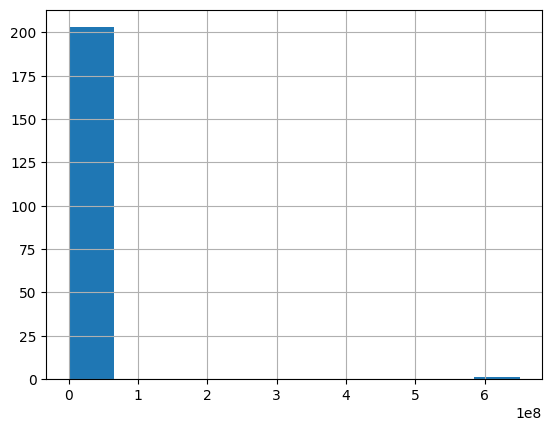

In [66]:
df.price.hist()

<Axes: >

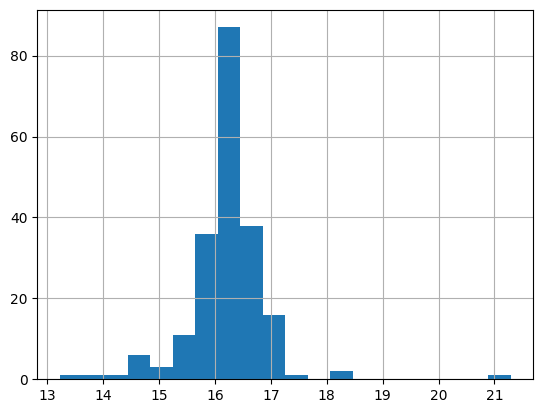

In [67]:
df.price.apply(lambda p: np.log(p)+1).hist(bins=20)

In [68]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['price'].apply(lambda p: np.log(p)+1))

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['price'].apply(lambda p: np.log(p)+1), nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density')

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['price'].apply(lambda p: np.log(p)+1).min(), df['price'].apply(lambda p: np.log(p)+1).max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="Price Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    height=400,
    width=1200
)
fig.show(renderer='colab')

## Outliers

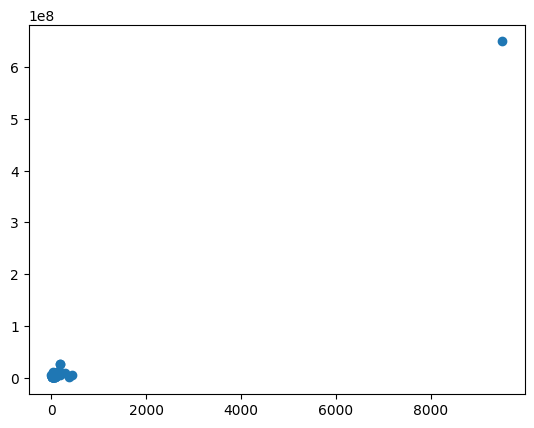

In [69]:
plt.scatter(x=df['area_sqm'], y=df['price'])

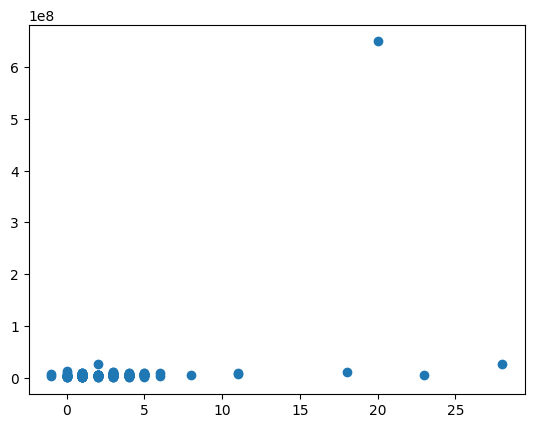

In [70]:
plt.scatter(x=df['floor_number'], y=df['price'])

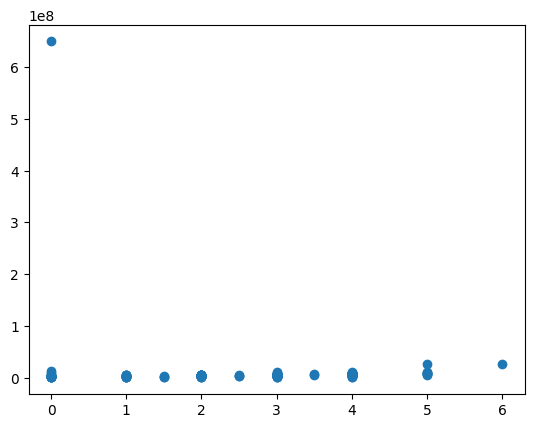

In [71]:
plt.scatter(x=df['rooms'], y=df['price'])

In [72]:
df = df[df['price'] < df['price'].max()].reset_index(drop = True)

## correlations

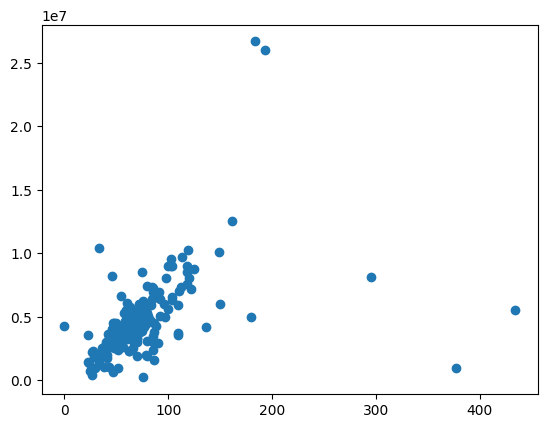

In [73]:
plt.scatter(x=df['area_sqm'], y=df['price'])

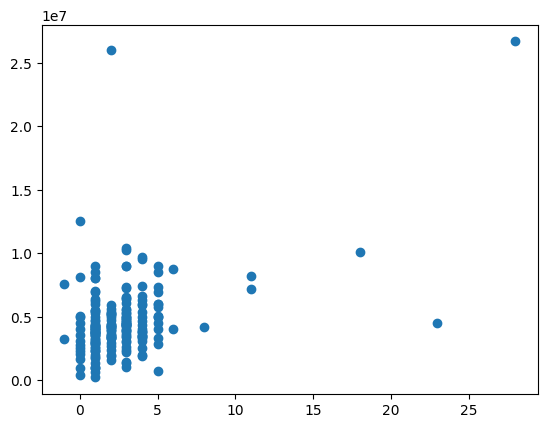

In [74]:
plt.scatter(x=df['floor_number'], y=df['price'])

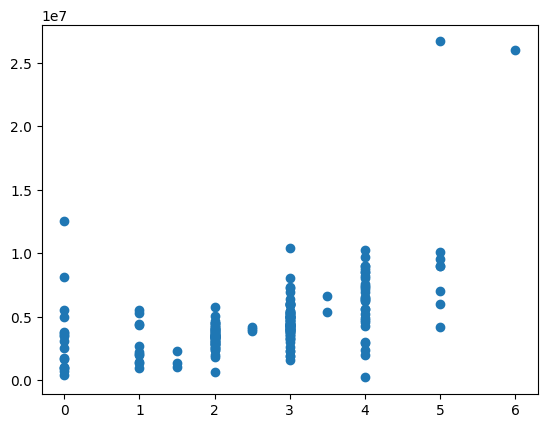

In [76]:
plt.scatter(x=df['rooms'], y=df['price'])

<Axes: >

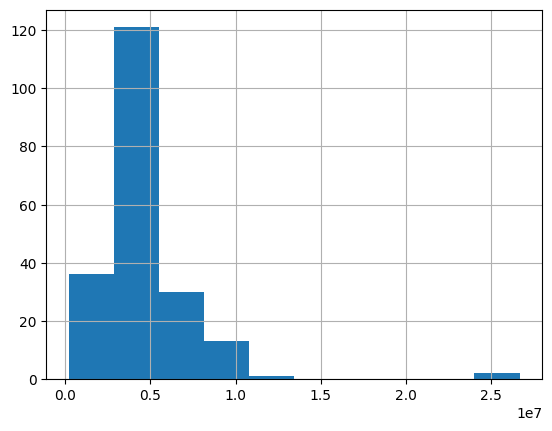

In [77]:
df.price.hist()

<Axes: >

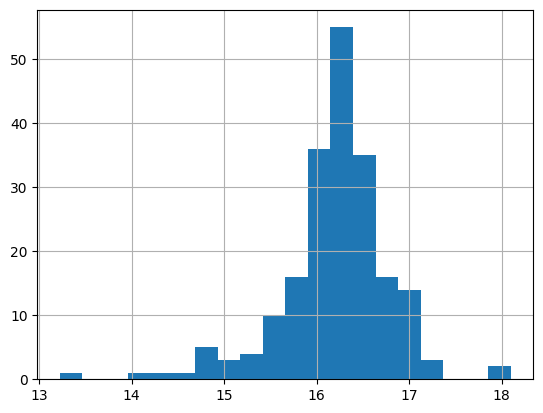

In [78]:
df.price.apply(lambda p: np.log(p)+1).hist(bins=20)

In [79]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['price'].apply(lambda p: np.log(p)+1))

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['price'].apply(lambda p: np.log(p)+1), nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density')

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['price'].apply(lambda p: np.log(p)+1).min(), df['price'].apply(lambda p: np.log(p)+1).max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="Price Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    height=400,
    width=1200
)
fig.show(renderer='colab')


In [80]:
df['ppm'] = (df['price']/ df['area_sqm'])

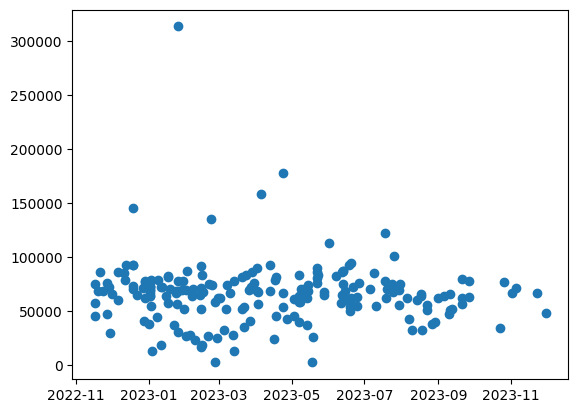

In [81]:
plt.scatter(x=df['date'], y=df['ppm'])

In [82]:
df.corr(numeric_only = True)

,rooms,area_sqm,price,block,parcel,sub_parcel,floor_number,ppm
rooms,1.000000,0.104152,0.517727,-0.065824,0.083752,0.125803,0.268417,0.278577
area_sqm,0.104152,1.000000,0.430948,-0.073236,0.086275,-0.031618,0.104813,-0.188906
price,0.517727,0.430948,1.000000,0.006034,-0.009269,0.070106,0.439551,0.538992
block,-0.065824,-0.073236,0.006034,1.000000,-0.417748,-0.167393,-0.078495,0.138570
parcel,0.083752,0.086275,-0.009269,-0.417748,1.000000,0.037137,0.064575,-0.116986
sub_parcel,0.125803,-0.031618,0.070106,-0.167393,0.037137,1.000000,0.289166,0.127569
floor_number,0.268417,0.104813,0.439551,-0.078495,0.064575,0.289166,1.000000,0.277620
ppm,0.278577,-0.188906,0.538992,0.138570,-0.116986,0.127569,0.277620,1.000000


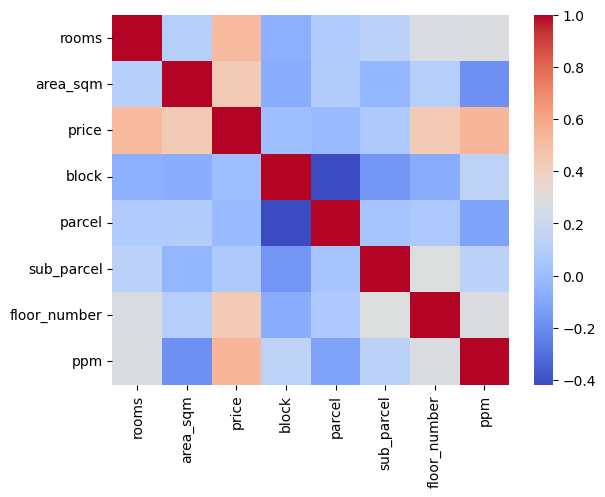

In [84]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [105]:
result = sm.ols(formula="price ~ area_sqm", data=df).fit()
print(result.params)


Intercept    2.614593e+06
area_sqm     2.763083e+04
dtype: float64


In [107]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     45.84
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.38e-10
Time:                        15:23:19   Log-Likelihood:                -3294.5
No. Observations:                 203   AIC:                             6593.
Df Residuals:                     201   BIC:                             6600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.615e+06   3.56e+05      7.344      0.000    1.91e+06    3.32e+06
area_sqm    2.763e+04   4080.926      6.771      0.000    1.96e+04    3.57e+04
==============================================================================
Omnibus:                      162.653   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4341.723
Skew:                           2.690   Prob(JB):                         0.00
Kurtosis:                      25.008   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
result = sm.ols(formula="price ~ floor_number", data=df).fit()
print(result.params)


Intercept       3.505813e+06
floor_number    4.277299e+05
dtype: float64


In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     48.13
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           5.35e-11
Time:                        15:09:37   Log-Likelihood:                -3293.6
No. Observations:                 203   AIC:                             6591.
Df Residuals:                     201   BIC:                             6598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.506e+06   2.51e+05     13.942      0.000    3.01e+06       4e+06
floor_number  4.277e+05   6.17e+04      6.938      0.000    3.06e+05    5.49e+05
==============================================================================
Omnibus:                      174.570   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4088.578
Skew:                           3.072   Prob(JB):                         0.00
Kurtosis:                      24.110   Cond. No.                         5.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
result = sm.ols(formula="price ~ rooms", data=df).fit()
print(result.params)

Intercept    1.318069e+06
rooms        1.281002e+06
dtype: float64


In [102]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     73.61
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.58e-15
Time:                        15:09:30   Log-Likelihood:                -3283.7
No. Observations:                 203   AIC:                             6571.
Df Residuals:                     201   BIC:                             6578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.318e+06   4.28e+05      3.077      0.002    4.73e+05    2.16e+06
rooms       1.281e+06   1.49e+05      8.579      0.000    9.87e+05    1.58e+06
==============================================================================
Omnibus:                      202.285   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5324.302
Skew:                           3.838   Prob(JB):                         0.00
Kurtosis:                      26.886   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
import statsmodels.formula.api as sm

result = sm.ols(formula="price ~ area_sqm + floor_number + rooms", data=df).fit()
print(result.params)


Intercept      -391609.862644
area_sqm         22972.741755
floor_number    286333.205589
rooms           993247.242265
dtype: float64


In [108]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     45.84
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.38e-10
Time:                        15:23:30   Log-Likelihood:                -3294.5
No. Observations:                 203   AIC:                             6593.
Df Residuals:                     201   BIC:                             6600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.615e+06   3.56e+05      7.344      0.000    1.91e+06    3.32e+06
area_sqm    2.763e+04   4080.926      6.771      0.000    1.96e+04    3.57e+04
==============================================================================
Omnibus:                      162.653   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4341.723
Skew:                           2.690   Prob(JB):                         0.00
Kurtosis:                      25.008   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# (*) we could also try to normalize the data
# (*) we could also apply logaritmic transfromation o the prices
# (*) possibly this is not a linear model?

## Geographic correlcation?

In [84]:
df['block_parcel'] = df.apply(lambda p: f"{p['block']:.0f}_{p['parcel']:.0f}", axis=1)

In [85]:
df.head()

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number,ppm,block_parcel
0,2023-11-30,4.0,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0,48467.650397,7437_10
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0,66666.666667,7226_45
2,2023-11-05,2.0,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0,71568.627451,6918_53
3,2023-11-02,1.0,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0,67059.208374,7438_13
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0,76461.769115,7451_22


In [86]:
df['block_parcel'].nunique()

161

In [87]:
df['block_parcel'].value_counts()

block_parcel
7226_93     6
6933_136    5
6909_35     4
7460_27     4
6911_127    3
           ..
6941_64     1
7453_5      1
6919_47     1
6911_47     1
6911_154    1
Name: count, Length: 161, dtype: int64

In [88]:
df['block'].nunique()

43

In [89]:
df['block'].value_counts()

block
6933.0    16
7226.0    15
6911.0    15
6907.0    12
6909.0    11
6936.0    10
7451.0     8
6904.0     7
7460.0     7
7429.0     7
6941.0     7
6918.0     6
7430.0     6
6910.0     6
7085.0     6
6937.0     5
7462.0     5
6920.0     4
7103.0     3
7453.0     3
6913.0     3
7437.0     3
7446.0     3
7450.0     3
6919.0     3
7441.0     2
7227.0     2
7422.0     2
7438.0     2
7431.0     2
7440.0     2
6912.0     2
7228.0     2
7434.0     2
7435.0     2
6925.0     2
7444.0     1
7439.0     1
7442.0     1
7104.0     1
7445.0     1
7455.0     1
7245.0     1
Name: count, dtype: int64

In [90]:
df['block'].value_counts().head(15)

block
6933.0    16
7226.0    15
6911.0    15
6907.0    12
6909.0    11
6936.0    10
7451.0     8
6904.0     7
7460.0     7
7429.0     7
6941.0     7
6918.0     6
7430.0     6
6910.0     6
7085.0     6
Name: count, dtype: int64

In [91]:
df['block'].value_counts().head(15).index

Index([6933.0, 7226.0, 6911.0, 6907.0, 6909.0, 6936.0, 7451.0, 6904.0, 7460.0,
       7429.0, 6941.0, 6918.0, 7430.0, 6910.0, 7085.0],
      dtype='float64', name='block')

In [92]:
selected_blocks = df[df['block'].isin([7226.0, 6933.0, 6911.0, 6907.0, 6909.0, 6936.0, 7451.0, 6904.0, 7460.0,
       7429.0, 6941.0, 7430.0, 6910.0, 7085.0, 6937.0])].copy()

In [93]:
selected_blocks

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number,ppm,block_parcel
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0,66666.666667,7226_45
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0,76461.769115,7451_22
5,2023-10-23,0.0,109.00,3725000.0,6907.0,32.0,23.0,חנות,1.0,34174.311927,6907_32
6,2023-09-27,3.0,64.50,4075000.0,6907.0,82.0,5.0,דירה בבית קומות,1.0,63178.294574,6907_82
7,2023-09-27,2.0,44.85,3500000.0,6941.0,123.0,6.0,דירה בבית קומות,2.0,78037.904125,6941_123
...,...,...,...,...,...,...,...,...,...,...,...
196,2022-11-27,4.0,91.00,6900000.0,6936.0,63.0,1.0,דירה בבית קומות,1.0,75824.175824,6936_63
197,2022-11-24,2.0,41.64,2870000.0,6911.0,71.0,7.0,דירה בבית קומות,1.0,68924.111431,6911_71
200,2022-11-17,3.0,63.00,3610000.0,6910.0,29.0,8.0,דירה בבית קומות,1.0,57301.587302,6910_29
201,2022-11-17,3.0,56.90,2600000.0,6933.0,21.0,22.0,דירה בבית קומות,1.0,45694.200351,6933_21


## Exploring the Categorical Fields

In [94]:
selected_blocks['block'] = selected_blocks['block'].astype(int).astype(str).astype('category')

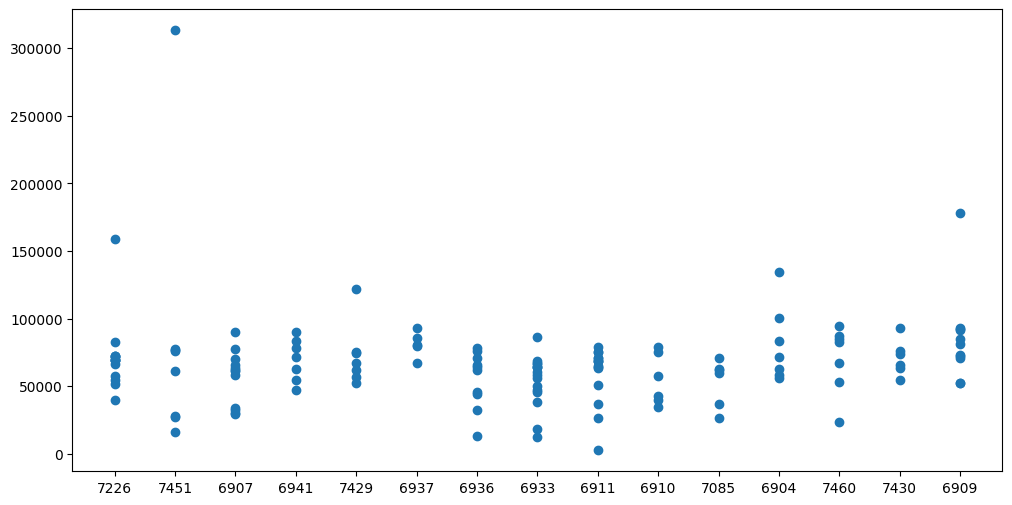

In [95]:
plt.figure(figsize=(12,6))
fig = plt.scatter(x=selected_blocks['block'], y=selected_blocks['ppm'])

In [96]:
fig = px.box(selected_blocks, x='block', y='ppm', template='plotly_white', height=600)
fig.show(renderer='colab')


In [99]:
df

,date,rooms,area_sqm,price,block,parcel,sub_parcel,description_,floor_number,ppm,block_parcel
0,2023-11-30,4.0,88.10,4270000.0,7437.0,10.0,4.0,דירה בבית קומות,3.0,48467.650397,7437_10
1,2023-11-23,3.0,69.00,4600000.0,7226.0,45.0,6.0,דירה בבית קומות,3.0,66666.666667,7226_45
2,2023-11-05,2.0,51.00,3650000.0,6918.0,53.0,38.0,דירה בבית קומות,3.0,71568.627451,6918_53
3,2023-11-02,1.0,30.57,2050000.0,7438.0,13.0,2.0,דירה בבית קומות,0.0,67059.208374,7438_13
4,2023-10-26,3.0,66.70,5100000.0,7451.0,22.0,6.0,דירה בבית קומות,2.0,76461.769115,7451_22
...,...,...,...,...,...,...,...,...,...,...,...
198,2022-11-21,4.0,119.00,10250000.0,7438.0,1.0,9.0,דירה בבית קומות,3.0,86134.453782,7438_1
199,2022-11-20,3.0,64.00,4388000.0,7462.0,9.0,10.0,דירה בבית קומות,1.0,68562.500000,7462_9
200,2022-11-17,3.0,63.00,3610000.0,6910.0,29.0,8.0,דירה בבית קומות,1.0,57301.587302,6910_29
201,2022-11-17,3.0,56.90,2600000.0,6933.0,21.0,22.0,דירה בבית קומות,1.0,45694.200351,6933_21


In [100]:
df['description_'].value_counts().to_frame()

,count
description_,
דירה בבית קומות,173
משרד,10
Unknown,9
חנות,8
דירת גג,2
דירת גן,1


In [101]:
df.groupby(['description_','rooms']).agg({'date':'count', 'price':'mean', 'ppm':'mean'})

date         price            ppm
description_    rooms                                   
Unknown         2.0       4  3.431184e+06   71863.471259
                3.0       2  3.256924e+06   53088.518244
                5.0       2  1.783184e+07  115724.904682
                6.0       1  2.600000e+07  134715.025907
דירה בבית קומות 1.0      10  3.128700e+06   71706.877575
                1.5       3  1.536667e+06   49532.679149
                2.0      49  3.445714e+06   70114.755201
                2.5       3  4.003333e+06   71204.675216
                3.0      69  4.543232e+06            NaN
                3.5       2  5.975000e+06   98561.665194
                4.0      31  6.245839e+06   68285.900767
                5.0       6  7.634000e+06   63670.618506
דירת גג         3.0       2  7.700000e+06  182352.539448
דירת גן         3.0       1  5.442000e+06   68886.075949
חנות            0.0       7  2.349429e+06   35485.655650
                1.0       1  9.750000e+05   18750.000000
משרד            0.0      10  4.216700e+06   31955.890596

In [102]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [103]:
group_by_description = df.groupby(['description_','rooms']).agg({'date':'count', 'price':'mean', 'ppm':'mean'})

In [104]:
group_by_description.reset_index(inplace=True)

In [105]:
group_by_description

,description_,rooms,date,price,ppm
0,Unknown,2,4,3431184,71863
1,Unknown,3,2,3256924,53089
2,Unknown,5,2,17831844,115725
3,Unknown,6,1,26000000,134715
4,דירה בבית קומות,1,10,3128700,71707
5,דירה בבית קומות,2,3,1536667,49533
6,דירה בבית קומות,2,49,3445714,70115
7,דירה בבית קומות,2,3,4003333,71205
8,דירה בבית קומות,3,69,4543232,NaN
9,דירה בבית קומות,4,2,5975000,98562


In [106]:
group_by_description.rename(columns={'date':'count'}, inplace=True)

In [107]:
fig = px.bar(group_by_description, x='rooms', y='price', color='description_', barmode='group', template='plotly_white', width=1200)
fig.update_layout(bargap = 0.1 )
fig.show(renderer='colab')


In [108]:
fig = px.bar(group_by_description, x='rooms', y='ppm', color='description_', barmode='group', template='plotly_white', width=1000)
fig.update_layout(bargap = 0.1 )
fig.show(renderer='colab')


# 5. Widgets simple exploration tool

In [109]:
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox

layout = widgets.Layout(width='auto') #set width and height


In [110]:
list_of_columns = df.columns
x_col_widget = widgets.Dropdown(
    options=list_of_columns,
    description='X column:',
    value = list_of_columns[1],
    disabled=False,
    style = {'description_width': 'initial'}
)
y_col_widget = widgets.Dropdown(
    options=list_of_columns,
    description='Y column:',
    value = list_of_columns[2],
    disabled=False,
    style = {'description_width': 'initial'}
)
color_group_widget = widgets.Dropdown(
    options=list_of_columns,
    description='Color Column Group:',
    value = list_of_columns[3],
    disabled=False,
    style = {'description_width': 'initial'}
)
top_values_widget = widgets.Dropdown(
    options=[str(i) for i in range(15)],
    description='Choose Number of top values by count:',
    value = '2',
    disabled=False,
    style = {'description_width': 'initial'}
)
type_of_graph_widget = widgets.Dropdown(
    options=['scatter','bar'],
    description='Choose Graph:',
    value = 'bar',
    disabled=False,
    style = {'description_width': 'initial'}
)
color_scale_widget = widgets.Dropdown(
    options=px.colors.named_colorscales(),
    description='Color sclae name:',
    value = 'bupu',
    disabled=False,
    style = {'description_width': 'initial'}
)


In [111]:
HBox1 = HBox([x_col_widget,y_col_widget,color_group_widget])
HBox2 = HBox([top_values_widget,type_of_graph_widget,color_scale_widget])
VBox([HBox1,HBox2])



In [112]:
x_data = x_col_widget.value
y_data = y_col_widget.value

color_data = color_group_widget.value
color_scale = color_scale_widget.value
top_cat = int(top_values_widget.value)


filter_values = df[color_data].value_counts().index[0:top_cat]
subset = df[df[color_data].isin(filter_values)].copy()

if (type_of_graph_widget.value=='scatter'):
    fig = px.scatter(subset, x=x_data, y=y_data, color=color_data, color_continuous_scale = color_scale)
    fig.update_layout(width = 1200)
    fig.show(renderer='colab')

else:
    fig = px.bar(subset, x=x_data, y=y_data, color=color_data,color_continuous_scale=color_scale)
    fig.show(renderer='colab')


## Graphing examples

https://plotly.com/python/

https://seaborn.pydata.org/examples/index.html

## Further Reading:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview